#### Exploratory Data Analysis: Part 2

This notebook contains sample visualizations of the audio data.

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import librosa

from os import listdir

As an example, I'll load the first sample in the English set from voxforge:

In [3]:
sample, sr = librosa.load('../audio/4_voxforge/en/en0000-000.wav', sr=16000)

The transformation used for classification, the Mel frequency cepstrum coefficient (MFCC), breaks down an audio sample into a specified number of frequencies that combine to make up the original sound wave. Each additional added coefficient represents the largest amount of the sound not yet represented in the prior coefficients, so there is a diminishing amount of variance for each coefficient added.
Because of this, coefficients beyond the first three or four tend to be fairly clustered with a small amount of variation around values of 0.

I will create two mfcc arrays for the example audio with 3 and 10 coefficients respectively. The 10 coefficient array is the data transformation used in modeling, but the 3 coefficient array is more useful for visualization. 

In [4]:
sample_mfcc3 = librosa.effects.feature.mfcc(sample, sr=sr, n_mfcc=3)
sample_mfcc10 = librosa.effects.feature.mfcc(sample, sr=sr, n_mfcc=10)

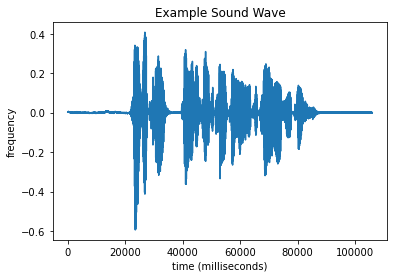

In [8]:
plt.plot(sample)
plt.title('Example Sound Wave')
plt.xlabel('time (milliseconds)')
plt.ylabel('frequency')
plt.show()

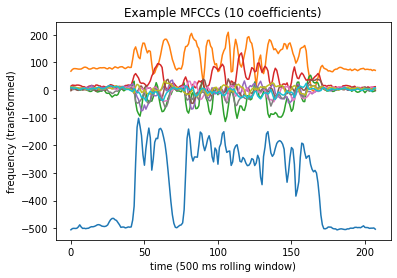

In [12]:
plt.plot(sample_mfcc10.T)
plt.title('Example MFCCs (10 coefficients)')
plt.xlabel('time (500 ms rolling window)')
plt.ylabel('frequency (transformed)')
plt.show()

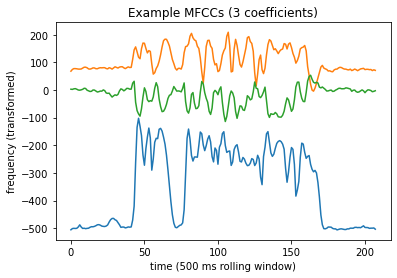

In [13]:
plt.plot(sample_mfcc3.T)
plt.title('Example MFCCs (3 coefficients)')
plt.xlabel('time (500 ms rolling window)')
plt.ylabel('frequency (transformed)')
plt.show()

Even though the original series and the MFCC representation are on different scales, you can see visually where the major activity lines  up. 
By reducing from 10 to 3 coefficients, we can see that the first coefficients to be added have the greatest scale and variance, with both seeming to descend as more coefficients are added. They also can be seen to alternate between appearing above and below the 0 frequency baseline. The blue coefficient is first, the widest range, and the furthest from the baseline. The orange is second, the second widest range, and the second furthest from the baseline. This continues on for each successive coefficient.
This means that the majority of the information in an audio sample will be captured in the first few coefficients. 

To look at some more audio samples, I'll load in the MFCC arrays:

In [16]:
mfcc_files = ['../data/training/' + f for f in listdir('../data/training/') if 'mfcc.pkl' in f]
mfcc_files.sort()

In [17]:
def reload(path):
    """
    Reloads a pickled file
    
    Parameters:
        path (str) : the file path of the pickle
    
    Returns:
        None
    """
    with open(path, 'rb') as f:
        return pickle.load(f)

In [18]:
mfcc_reloaded = [reload(f) for f in mfcc_files]
target_reloaded = [reload(f) for f in target_files]

In [30]:
def plot_random(mfcc_arr, title, n_mfcc=10):
    """
    Plots 3 randomly pulled samples' MFCC values
    
    Parameters:
        mfcc_arr (numpy arr) : the master array to pull samples from
        title (str) : a title for the plot
        n_mfcc (int) : the number of Mel frequency cepstrum coefficients to plot (default 10)
    
    Returns:
        None
    """
    a, b, c = np.random.randint(0, len(mfcc_arr), 3)
    fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16, 6))
    fig.suptitle(title)
    ax[0].plot(mfcc_arr[a, :n_mfcc].T)
    ax[1].plot(mfcc_arr[b, :n_mfcc].T)
    ax[2].plot(mfcc_arr[c, :n_mfcc].T)
    plt.show()

By plotting random samples of each language's MFCC graphs, I can look to see if any patterns emerge. For simplicity and visual ease, only the first 3 coefficients are included. 

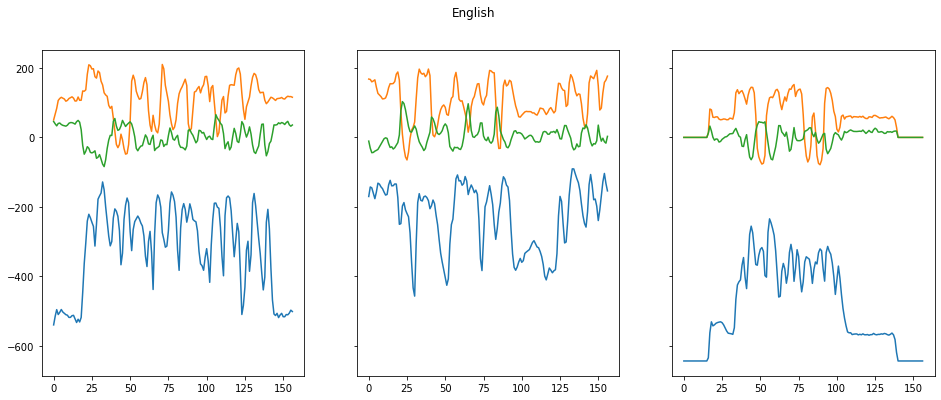

In [31]:
plot_random(mfcc_reloaded[0], 'English', 3)

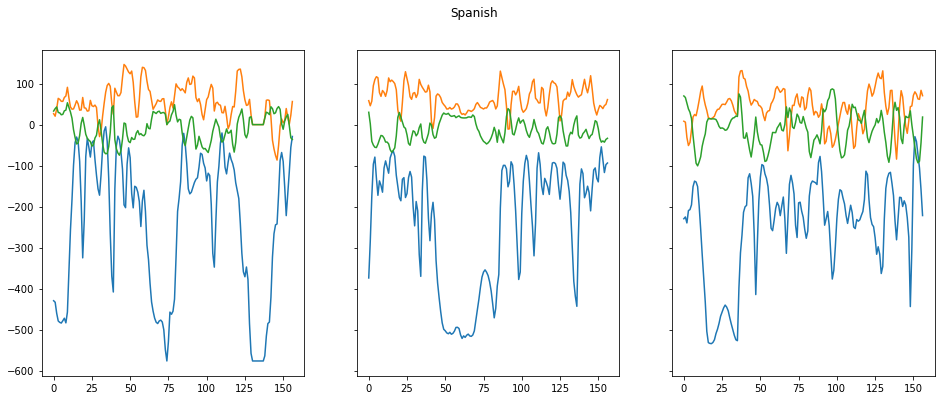

In [88]:
plot_random(mfcc_reloaded[1], 'Spanish', 3)

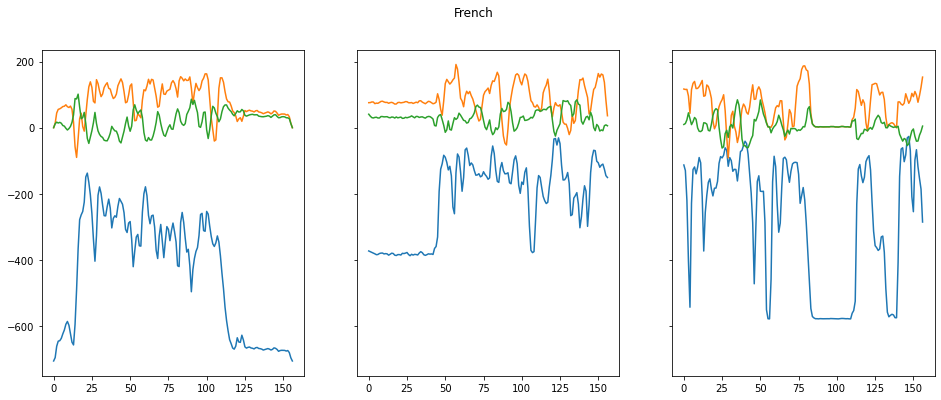

In [89]:
plot_random(mfcc_reloaded[2], 'French', 3)

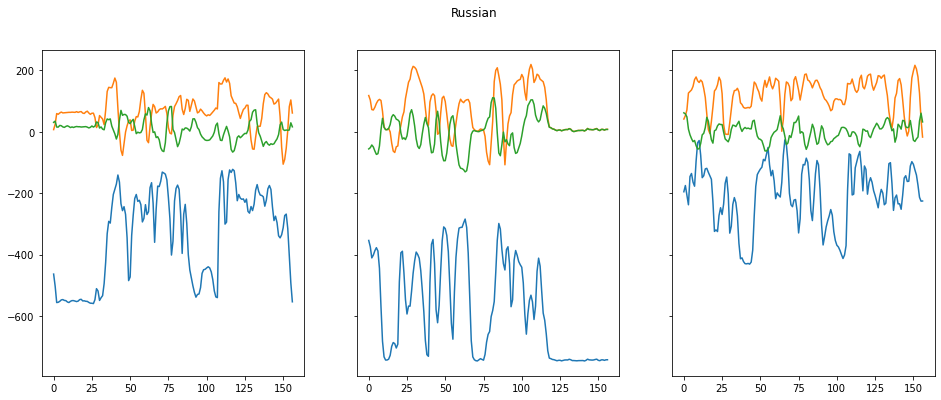

In [90]:
plot_random(mfcc_reloaded[3], 'Russian', 3)

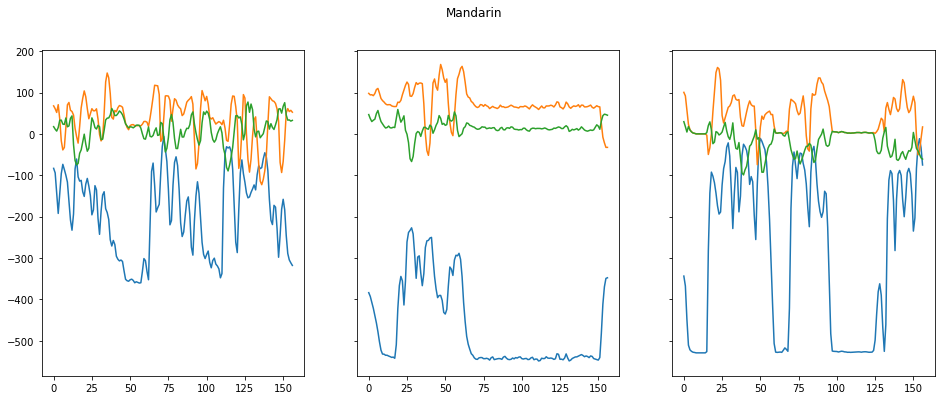

In [91]:
plot_random(mfcc_reloaded[4], 'Mandarin', 3)

Unfortunately, there don't seem to be any consistent trends among the languages' MFCC graphs, but visualizating them does create a better understanding of their values. Additionally, it illustrates the rather wide variety among the samples both in terms of frequencies and durations of actual speech within the sample. 

It's possible that trends could emerge if we examine the average values of the coefficients across the entire language sample.

In [124]:
def plot_avg(mfcc_arr, title=None, n_mfcc=10):
    """
    Plots the average coefficient values from a master array
    
    Parameters:
        mfcc_arr (numpy arr) : the master array to pull samples from
        title (str) : a title for the plot (default None)
        n_mfcc (int) : the number of Mel frequency cepstrum coefficients to plot (default 10)
    """
    avg_arr = np.apply_along_axis(np.mean, axis=0, arr=mfcc_arr)
    plt.plot(avg_arr.T[:, :n_mfcc])
    plt.ylim([-450, 150])
    plt.title(title)
    plt.show()

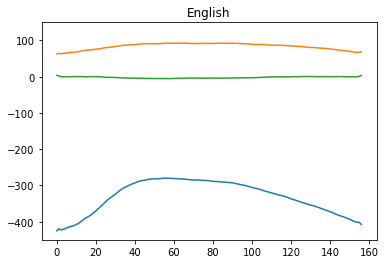

In [125]:
plot_avg(mfcc_reloaded[0], title='English', n_mfcc=3)

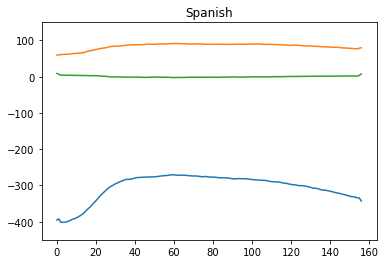

In [128]:
plot_avg(mfcc_reloaded[1], title='Spanish', n_mfcc=3)

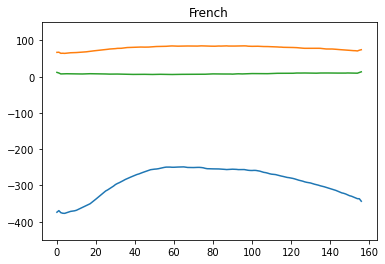

In [129]:
plot_avg(mfcc_reloaded[2], title='French', n_mfcc=3)

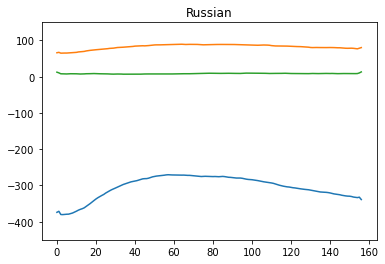

In [130]:
plot_avg(mfcc_reloaded[3], title='Russian', n_mfcc=3)

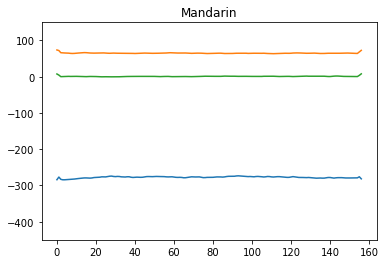

In [131]:
plot_avg(mfcc_reloaded[4], title='Mandarin', n_mfcc=3)

In general, it seems like the second and third (orange and green) coefficients have consistent means across the duration of the samples. For every language except Mandarin, however, the first (blue) coefficient seems to have a mean with a significant rise at the beginning of the sample and a slow descent across the duration. This could possibly show a speech pattern of phrases in European languages beginning with lower tones, rising, then falling as a phrase continues. Mandarin, as a tonal language, may not see the same change in tone across a phrase when each word separately requires its own intonation. 